# Bab 2 Hebb Net

## Fungsi-fungsi *plotting*

Jangan mengubah kode pada *cell* di bawah ini.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def line(w, th=0):
    w2 = w[2] + .001 if w[2] == 0 else w[2]

    return lambda x: (th - w[1] * x - w[0]) / w2


def plot(func, X, target, padding=1):
    X = np.array(X)

    x_vals, y_vals = X[:, 1], X[:, 2]
    xmin, xmax, ymin, ymax = x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()

    color = 'ro', 'bo'
    line_x = np.arange(xmin-padding-1, xmax+padding+1)

    for c, v in enumerate(np.unique(target)):
        p = X[np.where(target == v)]

        plt.plot(p[:,1], p[:,2], color[c])

    plt.axis([xmin-padding, xmax+padding, ymin-padding, ymax+padding])
    plt.plot(line_x, func(line_x))
    plt.show()

## Praktikum

### a) Fungsi *step* Bipolar

Tulis kode ke dalam *cell* di bawah ini:

In [ ]:
def bipstep(y, th=0):
  return 1 if y>= th else -1

### b) Fungsi *training* Hebb

Tulis kode ke dalam *cell* di bawah ini:

In [ ]:
def hebb_fit(train, target, verbose = False, draw = False, draw_padding = 1):
  w = np.zeros(len(train[0]) + 1)
  bias = np.ones((len(train), 1))
  train = np.hstack((bias, train))

  for r, row in enumerate(train):
    w =[w[i] + row[i] * target[r] for i in range(len(row))]

    if verbose:
      print('Bobot: ', w)
    if draw:
      plot(line(w, 0), train, target, draw_padding)

  return w

### c) Fungsi *testing* Hebb

Tulis kode ke dalam *cell* di bawah ini:

In [ ]:
def hebb_predict(X, w):
  Y = []
  for x in X:
    y_in = w[0] + np.dot(x, w[1:])
    y = bipstep(y_in)
    Y.append(y)
  return Y


### d) Fungsi Hitung Akurasi

In [ ]:
def calc_accuracy (a, b):
  S= [1 if a[i] == b[i] else 0 for i in range(len(a))]
  return sum(s) / len(a)

### e) Logika AND

Tulis kode ke dalam *cell* di bawah ini:

In [ ]:
from sklearn.metrics import accuracy_score

train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = 1, -1, -1, -1

model = hebb_fit(train, target, verbose = False, draw = False)
output = hebb_predict(train, model)
accuracy = accuracy_score(output, target)

print('Output: ', output)
print('Target: ', target)
print('Akurasi: ', accuracy)

Output:  [1, -1, -1, -1]
Target:  (1, -1, -1, -1)
Akurasi:  1.0


### f) Logika OR

Tulis kode ke dalam *cell* di bawah ini:

Bobot:  [1.0, 1.0, 1.0]


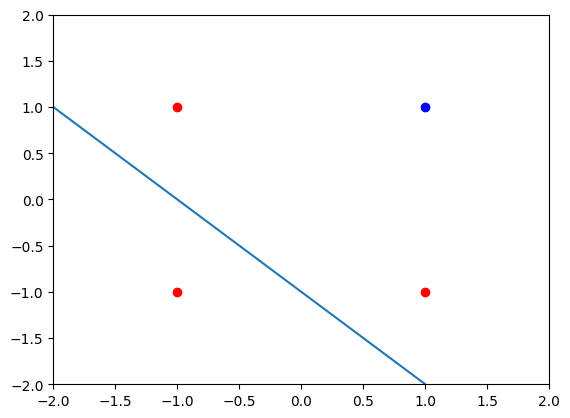

Bobot:  [0.0, 0.0, 2.0]


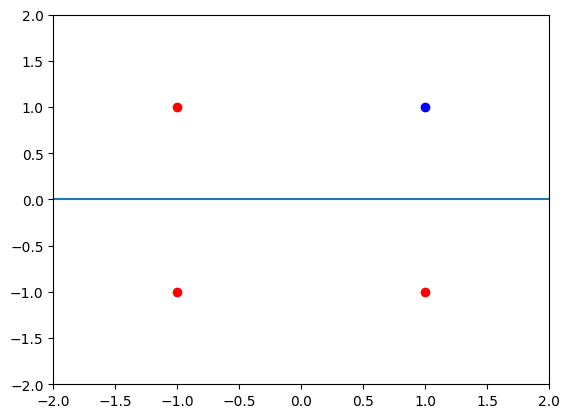

Bobot:  [-1.0, 1.0, 1.0]


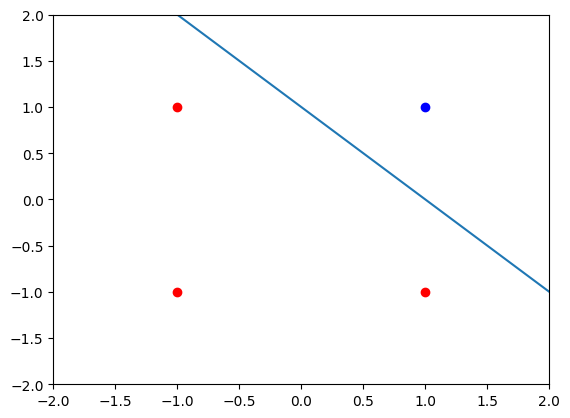

Bobot:  [-2.0, 2.0, 2.0]


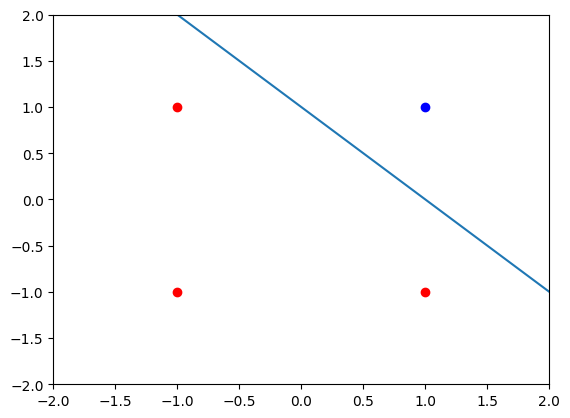

Output:  [1, -1, -1, -1]
Target:  (1, -1, -1, -1)
Akurasi:  1.0


In [ ]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = 1, -1, -1, -1

model = hebb_fit(train, target, verbose = True, draw = True)
output = hebb_predict(train, model)
accuracy = accuracy_score(output, target)

print('Output: ', output)
print('Target: ', target)
print('Akurasi: ', accuracy)

### g) Logika AND NOT

Tulis kode ke dalam *cell* di bawah ini:

Bobot:  [1.0, 1.0, 1.0]


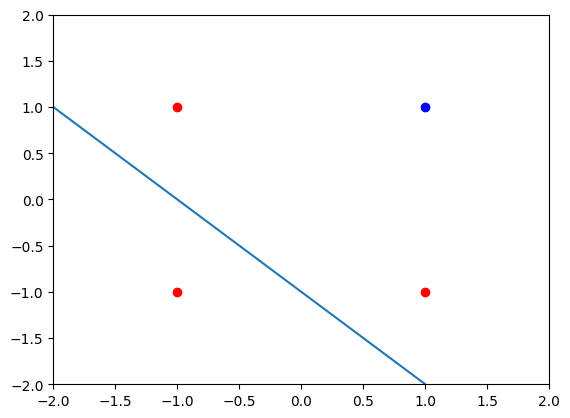

Bobot:  [0.0, 0.0, 2.0]


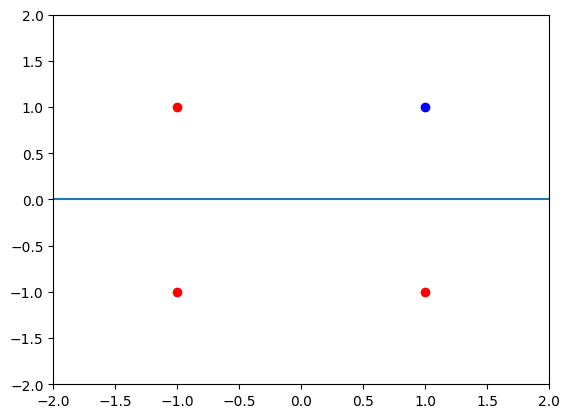

Bobot:  [-1.0, 1.0, 1.0]


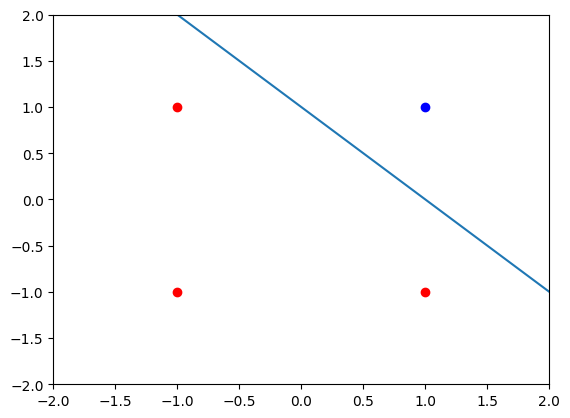

Bobot:  [-2.0, 2.0, 2.0]


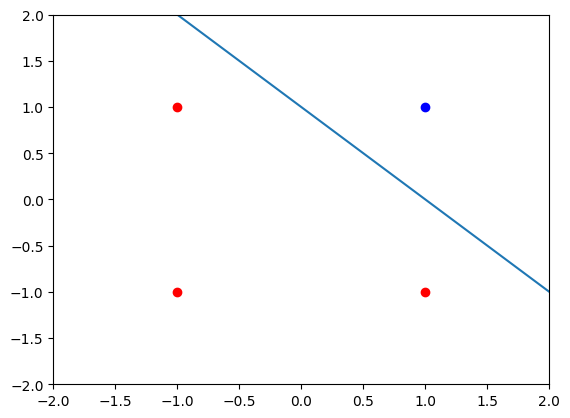

Output:  [1, -1, -1, -1]
Target:  (1, -1, -1, -1)
Akurasi:  1.0


In [ ]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = 1, -1, -1, -1

model = hebb_fit(train, target, verbose = True, draw = True)
output = hebb_predict(train, model)
accuracy = accuracy_score(output, target)

print('Output: ', output)
print('Target: ', target)
print('Akurasi: ', accuracy)

### h) Logika XOR

Tulis kode ke dalam *cell* di bawah ini:

Bobot:  [1.0, 1.0, 1.0]


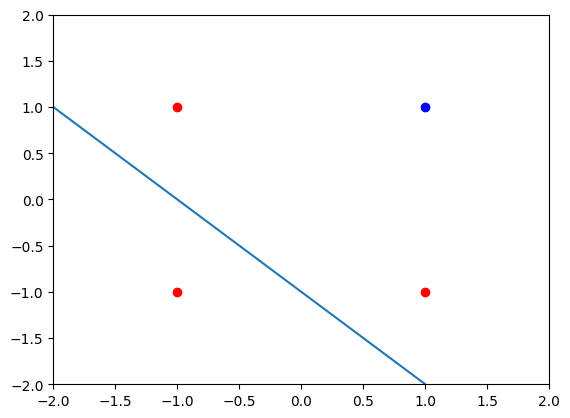

Bobot:  [0.0, 0.0, 2.0]


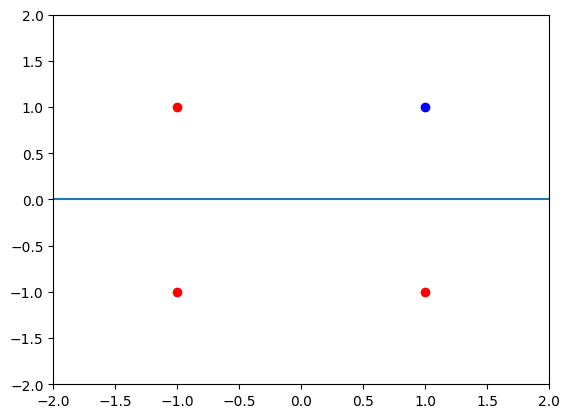

Bobot:  [-1.0, 1.0, 1.0]


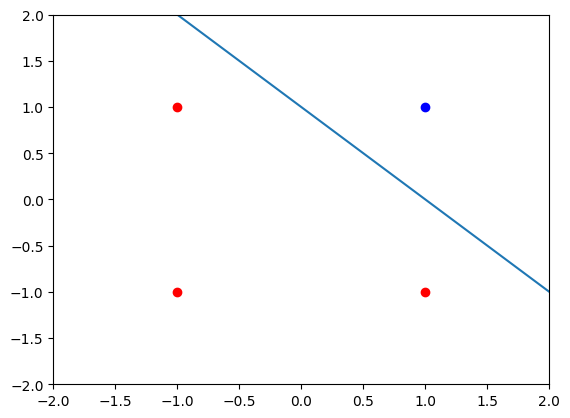

Bobot:  [-2.0, 2.0, 2.0]


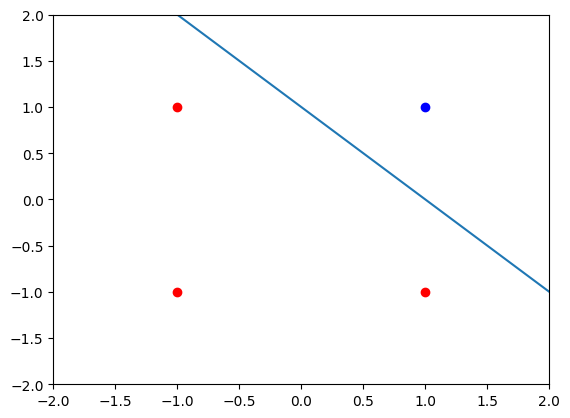

Output:  [1, -1, -1, -1]
Target:  (1, -1, -1, -1)
Akurasi:  1.0


In [ ]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = 1, -1, -1, -1

model = hebb_fit(train, target, verbose = True, draw = True)
output = hebb_predict(train, model)
accuracy = accuracy_score(output, target)

print('Output: ', output)
print('Target: ', target)
print('Akurasi: ', accuracy)

Analisis
1. Pada klasifikasi menggunakan logika XOR, mengapa akurasi yang
didapatkan tidak mencapai 1 (100%)?
2. Lakukan proses training dan testing menggunakan data berikut.
Training: (-1, .5), (.5, .3), (1, 1.5), (3, 1.9)
Target: (-1, -1, 1, 1)
Berapakah akurasi yang didapatkan? Mengapa tidak dapat mencapai akurasi 1 (100%)?
  

1. Karena logika XOR, bukan merupakan permasalahan yang bersifat yang non-linear. Sehingga metode hebbian, yang digunakan untuk klasifikasi linear, tidak dapat menangani data.
2. Karen fungsi hebbian hanya dapat memisahkan data secara linear. Sehingga pada kasus nomor dua, untuk kasus ini merupakan kasus non-lineaer sehingga fungsi ini tidak dapat bekerja dengan baik.

Bobot:  [-1.0, 1.0, -0.5]


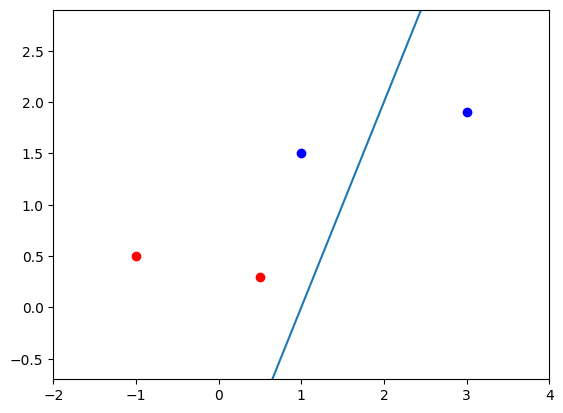

Bobot:  [-2.0, 0.5, -0.8]


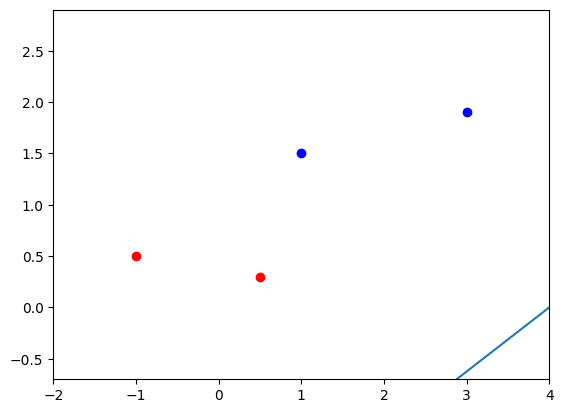

Bobot:  [-1.0, 1.5, 0.7]


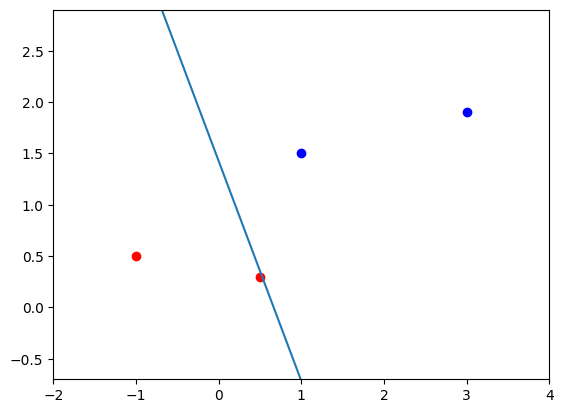

Bobot:  [0.0, 4.5, 2.5999999999999996]


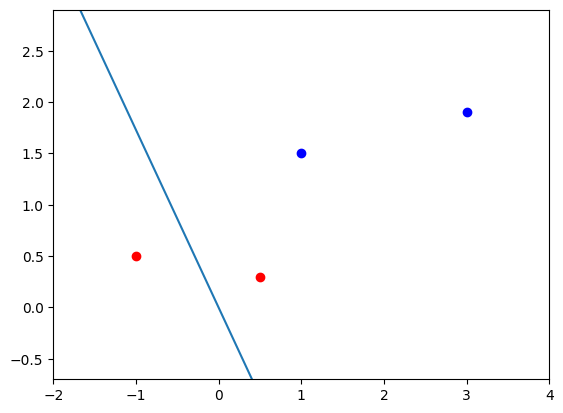

Output:  [-1, 1, 1, 1]
Target:  (-1, -1, 1, 1)
Akurasi:  0.75


In [ ]:
train = (-1, 0.5), (0.5, 0.3), (1, 1.5), (3, 1.9)
target = -1, -1, 1, 1

model = hebb_fit(train, target, verbose = True, draw = True)
output = hebb_predict(train, model)
accuracy = accuracy_score(output, target)

print('Output: ', output)
print('Target: ', target)
print('Akurasi: ', accuracy)